In [27]:
from qiskit import QuantumCircuit, QuantumRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.quantum_info.operators import Operator, Pauli


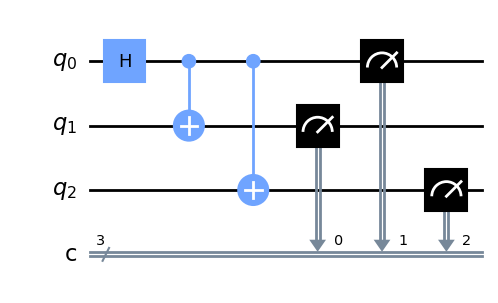

In [18]:
#En primer lugar creamos un circuito con n qubits, con m bits clásicos. Para ello, utilizamos el comando:
n=3
circ = QuantumCircuit(n,n)

#Para añadir puertas solo tenemos que escribir la puerta que queramos añadir junto 
#con el índice/s en los que la queramos añadir. Por ejemplo:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

#Además, podemos añadir medidas en la base computacional. Con el siguiente comando, que acepta dos vectores, generamos una 
#asociación entre los índices de qubits y bits, de manera que la medida del qubits [a_i] se guarda en el bits [b_i]. 
circ.measure([1,0,2], [0,1,2])


#Podemos dibujar el circuito con el comando:
circ.draw('mpl')

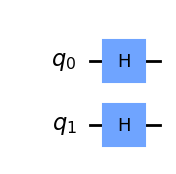

In [19]:
#También podemos crear un circuito sin medidas. 
s=2
qc = QuantumCircuit(s,name = "U")
qc.h(0)
qc.h(1)

qc.draw('mpl')


In [20]:
#Podemos generar un estado y pasarlo por el circuito, con el siguiente comando, que genera el estado |natural> en 
#la base computacional de número de qubits tam. Por ejemplo el estado |2> en la base computacional de 2 qubits:
tam = 2
natural = 0
state = Statevector.from_int(natural, 2**tam)
state.draw('latex')

<IPython.core.display.Latex object>

In [21]:
#Ahora podemos usar este estado como entrada:
salida = state.evolve(qc)
#Este comando nos devuelve una entrada poco legible.
salida

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


In [22]:
#Podemos utilizar este para obtener una entrada mas comprensible.
salida.draw('latex')

<IPython.core.display.Latex object>

In [23]:
#Por otra parte, para poder utilizar la medición, tenemos que utilizar un "backend" para compilar el circuito y convertirlo
#en un programa. Primero definimos el backend:
simulator = AerSimulator()


#Ahora compilamos el circuito:
circuit_compiled = transpile(circ,simulator)


#El resultado es un programa que podemos ejecutar. 
#Corremos el programa en el simulador un número "shots" de veces. 
#Al utilizar el comando run, obtenemos un objeto que trabaja asíncronamente. Con el comando status(), obtenemos el estado 
#actual, mientras que con result() obtenemos el resultado final, si es que lo hay. 
trabajo_sim = simulator.run(circuit_compiled, shots = 1024)
result = trabajo_sim.result()

result

Result(backend_name='aer_simulator', backend_version='0.12.0', qobj_id='', job_id='7b5faf40-990e-4eb7-a8ce-88a9ca3e64aa', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 498, '0x7': 526}), header=QobjExperimentHeader(creg_sizes=[['c', 3]], global_phase=0.0, memory_slots=3, metadata=None, n_qubits=3, name='circuit-124', qreg_sizes=[['q', 3]]), status=DONE, seed_simulator=2538971145, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0, 1, 2], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 3, 'num_clbits': 3, 'sample_measure_time': 0.0082601, 'input_qubit_map': [[0, 0], [1, 1], [2, 2]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': False}}, time_taken=0.033962)], date=2023-06-19T19:36:32.233637, status=COMPLETED, header=None, metadata={'parallel_experiments': 1, 'omp_enabled': True, 'max_memory_

In [24]:
#Como podemos ver, esta salida es bastante confusa. Podemos obtener el resultado del experimento con el comando:
counts = result.get_counts(circuit_compiled)
print(counts)

{'000': 498, '111': 526}


In [28]:
#Para poder modularizar el proceso de desarrollo de un circuito cuántico complejo, podemos convertir los circuitos que 
#queremos en operadores de caja negra.

U = Operator(qc)
print(U)

Operator([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


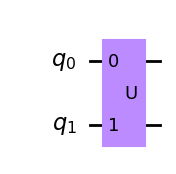

In [29]:
#Podemos añadir este operador a un circuito en sí mismo. 
c = QuantumCircuit(2)
c.append(qc.to_gate(),[0,1])

c.draw('mpl')

In [30]:
#Podemos comprobar fácilmente que este operador nos da el mismo resultado que el circuito del que proviene
state = Statevector.from_int(2, 2**2)
state.draw('latex')
salida = state.evolve(c)
salida.draw('latex')

<IPython.core.display.Latex object>

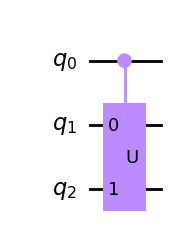

In [31]:
#También podemos añadir condicionalidad a estos operadores personalizados:
cond_c = QuantumCircuit(3)
condU = qc.to_gate().control(1)

cond_c.append(condU,[0,1,2])

cond_c.draw('mpl')